# DM2: "Connexionism: backpropagation algorithm"

_Eole Cervenka, Nov 13th 2017_

+ Python version: 3.6
+ libraries: sklean, numpy, pandas
+ dependencies:

    + `Eole_Cervenka_DM2_preparation.ipynb`
    + `Eole_Cervenka_DM2_exploration.ipynb`
    + `Eole_Cervenka_DM2_MLP.ipynb`
        
+ Data:
    + `data.csv` (cf Preparation section)

-------------------------------------------------
## I - Breast cancer data

### Preparation


The input data in file `breast-cancer.arff` is converted to `.csv` formatted file: `data.csv` such as:

```
'age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat','Class'
'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
...
```

### Load helper functions

In [1]:
%run utils/preparation.ipynb

In [2]:
%run utils/exploration.ipynb

In [3]:
%run utils/MLP_utils.ipynb

### Load data

I use the `pandas` library to load and manipulate the dataset.

In [4]:
import pandas as pd

fpath = "data.csv"
df = pd.read_csv(fpath, quotechar="'") # Load csv as pandas df

df.rename( columns={
        'tumor-size': 'tumor_size',
        'inv-nodes': 'inv_nodes',
        'node-caps' : 'node_caps',
        'deg-malig' : 'deg_malig',
        'breast-quad' : 'breast_quad'
    }, inplace=True)

df.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,ft_low,NaN,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


### Data exploration

In [5]:
attr_dict = attr_val_freq(df)
pprint(attr_dict)

{
  "age": {
    "40-49": 90,
    "50-59": 96,
    "60-69": 57,
    "30-39": 36,
    "70-79": 6,
    "20-29": 1
  },
  "menopause": {
    "premeno": 150,
    "ge40": 129,
    "lt40": 7
  },
  "tumor_size": {
    "15-19": 30,
    "35-39": 19,
    "30-34": 60,
    "25-29": 54,
    "40-44": 22,
    "10-14": 28,
    "0-4": 8,
    "20-24": 50,
    "45-49": 3,
    "50-54": 8,
    "5-9": 4
  },
  "inv_nodes": {
    "0-2": 213,
    "3-5": 36,
    "15-17": 6,
    "6-8": 17,
    "9-11": 10,
    "24-26": 1,
    "12-14": 3
  },
  "node_caps": {
    "yes": 56,
    "no": 222,
    "?": 8
  },
  "deg_malig": {
    "3": 85,
    "1": 71,
    "2": 130
  },
  "breast": {
    "right": 134,
    "left": 152
  },
  "breast_quad": {
    "left_up": 97,
    "central": 21,
    "ft_low": 1,
    "left_low": 109,
    "right_up": 33,
    "right_low": 24,
    "?": 1
  },
  "irradiat": {
    "no": 217,
    "NaN": 1,
    "yes": 68
  },
  "Class": {
    "recurrence-events": 85,
    "no-recurrence-events": 201
  }
}


In [6]:
# Attribut description
# Histogram de frequence des valeurs possible par attribut

# np.histogram...

# import matplotlib.pyplot as plt
# rng = np.random.RandomState(10)  # deterministic random data
# a = np.hstack((rng.normal(size=1000),
#                 rng.normal(loc=5, scale=2, size=1000)))

# plt.hist(a, bins='auto')  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")
# plt.show()

### Data preparation

1. Deal with missing attributes
2. Categorical values encoding

#### Missing values

Remove records with value `'?'` in attribute `node_caps` or `breast_quad`, or with value `'NaN'` in attribute `irradiat`

In [7]:
df = remove_missing_values(df)
df.head()

## OOPSIE; NaN in "irradiat"...

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
5,50-59,premeno,25-29,3-5,no,2,right,left_up,yes,no-recurrence-events


#### Categorical values encoding

In [8]:
df_encoded, label_encoder = encode_df(df)
df_encoded.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,Class
0,2,2,2,0,2,2,1,3,0,1
1,3,0,2,0,1,0,1,1,0,0
3,2,2,6,0,2,2,1,2,1,0
4,2,2,5,4,2,1,0,5,0,1
5,3,2,4,4,1,1,1,3,1,0


### Attribute overview

In [9]:
val_dict = attr_val_dict(df_encoded)

fpath = "/tmp/DM2_attr_val_encoded.json"
save_json(val_dict, fpath)

for k, v in val_dict.items(): print(k, sorted(v))

age [0, 1, 2, 3, 4, 5]
menopause [0, 1, 2]
tumor_size [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inv_nodes [0, 1, 2, 3, 4, 5, 6]
node_caps [0, 1, 2]
deg_malig [0, 1, 2]
breast [0, 1]
breast_quad [0, 1, 2, 3, 4, 5]
irradiat [0, 1]
Class [0, 1]


### Cross validation training

In [10]:
# matrix input X and label vector y
X, y = get_nn_inputs(df_encoded)

# Preview
print("Sample records:")
for r in X[:10]:
    print(r)
print("\nSample labels")
print(y[:10])

Sample records:
(2, 2, 2, 0, 2, 2, 1, 3, 0)
(3, 0, 2, 0, 1, 0, 1, 1, 0)
(2, 2, 6, 0, 2, 2, 1, 2, 1)
(2, 2, 5, 4, 2, 1, 0, 5, 0)
(3, 2, 4, 4, 1, 1, 1, 3, 1)
(3, 0, 7, 0, 1, 2, 0, 3, 0)
(2, 2, 1, 0, 1, 1, 0, 3, 0)
(2, 2, 0, 0, 1, 1, 1, 4, 0)
(2, 0, 7, 2, 2, 1, 1, 3, 1)
(3, 2, 4, 0, 1, 1, 0, 2, 0)

Sample labels
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [11]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', max_iter=1000) # default parameters
                    
from sklearn.model_selection import cross_val_score  
scores = cross_val_score(clf, X, y, cv=10)

print("Iterations score:")
for s in scores: print(s)

Iterations score:
0.666666666667
0.724137931034
0.689655172414
0.758620689655
0.678571428571
0.714285714286
0.821428571429
0.714285714286
0.75
0.535714285714


### Hyper-parameter optimization

In [12]:
layer_sizes_space = [tuple([i]) for i in range(2, 15)]
layer_sizes_space.extend( [tuple([i, j]) for i in range(2, 15) for j in range(2, 15)])

param_grid = {
    "hidden_layer_sizes" : layer_sizes_space,
    "learning_rate" : ['constant', 'invscaling', 'adaptive']
}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_grid,
    n_iter=20, # 30 (random) search iteration
    n_jobs=4, # 4 parallel jobs
    refit=True,
    cv=10, # 10-fold cross-validation
    verbose=0,
    random_state=None
)



random_search.fit(X, y)
print("best params:\n{}".format(random_search.best_params_))
print("best score :\n{}".format(random_search.best_score_))

# .../.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564:
# ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
#   % self.max_iter, ConvergenceWarning)

/home/eolus/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/eolus/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/eolus/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/eolus/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % sel

best params:
{'learning_rate': 'constant', 'hidden_layer_sizes': (14, 4)}
best score :
0.7228070175438597


### Discussion on choosing K in K-fold

**Le système apprend sur 10 sous-bases d’apprentissage et calcule à la fin les statistiques de performance.  
Qu’en pensez-vous pour le problème étudié ?**


We have to train a Neural Network (multi-layer perceptron) using a dataset of 286 labelled records with 9 attributes. The model is trying to predict based on a patient's attribute, whether they will have a recurrence of events (`Class : ['recurrence-events', 'no-recurrence-events']`).

Note that in an actual use-case, this may imply that we are more interested in a model that minimizes the number of false-negatives (instances in which the model fails to predict a recurrence of events) than one that minimizes the overall expected error. For simplicity however, we use the expected error as the loss function.

We use k-fold cross-validation to select the model which expected error is the smallest.  
In k-fold cross-validation:  
"_The original sample is randomly partitioned into k equal sized subsamples.  
Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling (see below) is that all observations are used for both training and validation, and each observation is used for validation exactly once. 10-fold cross-validation is commonly used,[7] but in general k remains an unfixed parameter._"  
[Wikipedia](https://en.wikipedia.org/wiki/Cross-validation_(statistics)

We understand that the choice of defaulting the value of k to 10 is arbitrary.  
What effects can a larger/smaller k have in measuring the expected error of the model?

The size of the training data impacts bias error and variance error.  
The choice of k changes the size of each fold.
```
fold_size = dataset_size / k
```

Therefore, a larger k (and smaller fold size) results in smaller bias error (less underfitting) and larger variance error (more overfitting).

### Learning curve

/home/eolus/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/eolus/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/eolus/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/eolus/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % sel

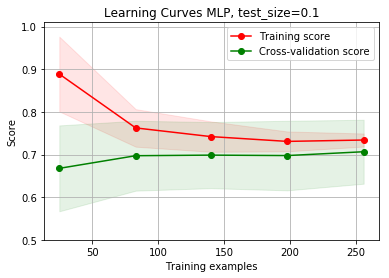

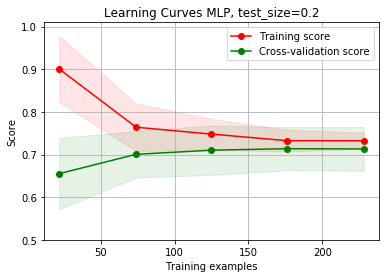

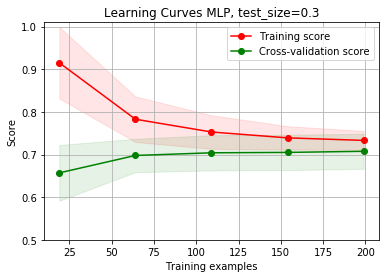

In [18]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

estimator = clf
test_sizes = [0.1, 0.2, 0.3]
for test_size in test_sizes:
    cv = ShuffleSplit(n_splits=100, test_size=test_size, random_state=0)
    title = "Learning Curves MLP, test_size={}".format(test_size)
    plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()